In [1]:
import pandas as pd
from tqdm import tqdm
import re
%matplotlib inline


In [2]:
df = pd.read_csv('Match Distances.csv')
del df['Unnamed: 0']

In [3]:
def convert_to_event(x):
    if 'MS' in x:
        return ('MS')
    elif 'WS' in x:
        return ('WS')
    elif 'WD' in x:
        return ('WD')
    elif 'MD' in x:
        return ('MD')
    elif 'XD' in x:
        return ('XD')

df['EVENT'] = df['EVENT'].apply(lambda x:convert_to_event(x))

In [4]:
df

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,Losing Country Coord_x,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance
0,"['[SWE] ', '[GER] ']",MS,"['Jacob Nilsson', 'Kai Schaefer']","['21-14', '22-20']","Huelva, Spain",20180424,SWE,GER,17.260488,64.712586,10.392278,51.110631,-6.94518,37.25455,4044.499342,2464.519258
1,"['[SUI] ', '[RUS] ']",WS,"['Sabrina Jaquet', 'Natalia Perminova']","['21-17', '13-21', '21-17']","Huelva, Spain",20180424,SUI,RUS,8.245024,46.799817,96.805372,61.989526,-6.94518,37.25455,1993.802113,11469.444434
2,"['[RUS] ', '[RUS] ', '[ENG] ', '[ENG] ']",XD,"['Rodion Alimov', 'Alina Davletova', 'Ben Lane...","['21-19', '27-25']","Huelva, Spain",20180424,RUS,ENG,96.805372,61.989526,-1.458628,52.592743,-6.94518,37.25455,11469.444434,1806.962309
3,"['[ENG] ', '[ENG] ', '[NED] ', '[NED] ']",XD,"['Marcus Ellis [3]', 'Lauren Smith', 'Robin Ta...","['17-21', '21-11', '21-15']","Huelva, Spain",20180424,ENG,NED,-1.458628,52.592743,5.616126,52.249375,-6.94518,37.25455,1806.962309,2173.108169
4,"['[FRA] ', '[FRA] ', '[NED] ', '[NED] ']",XD,"['Bastian Kersaudy', 'Lea Palermo', 'Jelle Maa...","['23-21', '21-12']","Huelva, Spain",20180424,FRA,NED,2.550540,46.559417,5.616126,52.249375,-6.94518,37.25455,1477.401661,2173.108169
5,"['[RUS] ', '[CZE] ']",MS,"['Sergey Sirant', 'Milan Ludik']","['21-11', '21-11']","Huelva, Spain",20180424,RUS,CZE,96.805372,61.989526,15.331770,49.738854,-6.94518,37.25455,11469.444434,2834.271380
6,"['[DEN] ', '[DEN] ', '[IRL] ', '[IRL] ']",XD,"['Mathias Christiansen [2]', 'Christinna Peder...","['21-18', '21-16']","Huelva, Spain",20180424,DEN,IRL,10.053934,55.959301,-8.146006,53.175880,-6.94518,37.25455,2805.107980,1760.533879
7,"['[DEN] ', '[DEN] ', '[FRA] ', '[FRA] ']",XD,"['Joachim Fischer Nielsen', 'Alexandra Bøje', ...","['21-16', '23-21']","Huelva, Spain",20180424,DEN,FRA,10.053934,55.959301,2.550540,46.559417,-6.94518,37.25455,2805.107980,1477.401661
8,"['[GER] ', '[BUL] ']",WS,"['Luise Heim', 'Linda Zetchiri']","['21-19', '21-17']","Huelva, Spain",20180424,GER,BUL,10.392278,51.110631,25.236412,42.755008,-6.94518,37.25455,2464.519258,3628.724839
9,"['[ENG] ', '[FRA] ']",MS,"['Toby Penty', 'Lucas Claerbout']","['21-10', '21-7']","Huelva, Spain",20180424,ENG,FRA,-1.458628,52.592743,2.550540,46.559417,-6.94518,37.25455,1806.962309,1477.401661


In [5]:
# Get winner and loser columns

def filter_name(string):
    del_chars = ['[',']','1','2','3','4','5','6','7','8','9','0']
    return_string = string
    for char in string:
        if char in del_chars:
            return_string = return_string.replace(char,'')
    
    return_string = return_string.strip()
    return (return_string)

#Take in line, player team you want to extract and singles or doubles
def split_players(x,player_num,s_or_d):
    #Need to filter out using regex
    return_val = re.findall("'(.*?)'",x)
    
    #Singles
    if s_or_d == 's':
        #only if there are two opponents
        if len(return_val) == 2 and player_num <= 1:
            for i in range(len(return_val)):
                return_val[i] = filter_name(return_val[i])
            return (return_val[player_num])
        else:
            return ('no opponent')
    
    #Doubles
    if s_or_d == 'd':
        #only if position exists
        if len(return_val) == 4 and player_num <= 1:
            for i in range(len(return_val)):
                return_val[i] = filter_name(return_val[i])
            #sort names alphbetically
            ret_list = sorted([return_val[player_num*2],return_val[player_num*2 + 1]])
            ret_str = filter_name(ret_list[0]) + ',' + ret_list[1]
            return (ret_str)
        else:
            return ('no opponent')

In [6]:
#Create the dataframes for each event
df_MS = df[df['EVENT'] == 'MS'].sort_values(by = 'match_week')
df_WS = df[df['EVENT'] == 'WS'].sort_values(by = 'match_week')
df_MD = df[df['EVENT'] == 'MD'].sort_values(by = 'match_week')
df_WD = df[df['EVENT'] == 'WD'].sort_values(by = 'match_week')
df_XD = df[df['EVENT'] == 'XD'].sort_values(by = 'match_week')

#Split players into winners and losers of a match
df_MS['WINNER'] = df_MS['PLAYERS'].apply(lambda x: split_players(x,0,'s'))
df_MS['LOSER'] = df_MS['PLAYERS'].apply(lambda x: split_players(x,1,'s'))
df_WS['WINNER'] = df_WS['PLAYERS'].apply(lambda x: split_players(x,0,'s'))
df_WS['LOSER'] = df_WS['PLAYERS'].apply(lambda x: split_players(x,1,'s'))
df_MD['WINNER'] = df_MD['PLAYERS'].apply(lambda x: split_players(x,0,'d'))
df_MD['LOSER'] = df_MD['PLAYERS'].apply(lambda x: split_players(x,1,'d'))
df_WD['WINNER'] = df_WD['PLAYERS'].apply(lambda x: split_players(x,0,'d'))
df_WD['LOSER'] = df_WD['PLAYERS'].apply(lambda x: split_players(x,1,'d'))
df_XD['WINNER'] = df_XD['PLAYERS'].apply(lambda x: split_players(x,0,'d'))
df_XD['LOSER'] = df_XD['PLAYERS'].apply(lambda x: split_players(x,1,'d'))

In [7]:
df_main = df_MS.copy(deep = True)
df_main = df_main.append(df_WS)
df_main = df_main.append(df_WD)
df_main = df_main.append(df_MD)
df_main = df_main.append(df_XD)

In [98]:
df_main

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,Losing Country Coord_x,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance,WINNER,LOSER
9058,"['[JPN] ', '[CHN] ']",MS,"['Onodera Yusuke', 'Chen Haoyang']","['11-5', '13-11', '11-6']","Hainan, China",20170110,JPN,CHN,139.271495,36.655227,103.930027,36.567348,109.60000,19.20000,3448.066472,835.149641,Onodera Yusuke,Chen Haoyang
9117,"['[CHN] ', '[CHN] ']",MS,"['Zhao Junpeng [2]', 'Zhu Siyuan']","['11-7', '6-11', '11-7', '6-11', '11-5']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Zhao Junpeng,Zhu Siyuan
9113,"['[CHN] ', '[CHN] ']",MS,"['Sun Feixiang', 'Wu Xin']","['11-7', '11-6', '11-7']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Sun Feixiang,Wu Xin
9108,"['[CHN] ', '[JPN] ']",MS,"['Zhao Junpeng [2]', 'Onodera Yusuke']","['11-5', '13-12', '11-3']","Hainan, China",20170110,CHN,JPN,103.930027,36.567348,139.271495,36.655227,109.60000,19.20000,835.149641,3448.066472,Zhao Junpeng,Onodera Yusuke
9104,"['[CHN] ', '[CHN] ']",MS,"['Wu Xin', 'Guo Kai']","['11-1', '11-3', '13-11']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Wu Xin,Guo Kai
9102,"['[CHN] ', '[CHN] ']",MS,"['Sun Feixiang', 'Gu Junfeng']","['5-11', '11-6', '11-3', '11-7']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Sun Feixiang,Gu Junfeng
9098,"['[CHN] ', '[THA] ']",MS,"['Zhu Siyuan', 'Wangcharoen Kantaphon']","['11-8', '11-8', '3-11', '13-10']","Hainan, China",20170110,CHN,THA,103.930027,36.567348,101.012239,15.116803,109.60000,19.20000,835.149641,962.131974,Zhu Siyuan,Wangcharoen Kantaphon
9085,"['[CHN] ', '[CHN] ']",MS,"['Zhao Junpeng [2]', 'Haichao Liu']","['11-4', '11-8', '11-8']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Zhao Junpeng,Haichao Liu
9084,"['[CHN] ', '[INA] ']",MS,"['Sun Feixiang', 'Andre Marteen']","['11-6', '12-13', '11-4', '11-6']","Hainan, China",20170110,CHN,INA,103.930027,36.567348,113.915865,-0.989818,109.60000,19.20000,835.149641,954.360259,Sun Feixiang,Andre Marteen
9074,"['[CHN] ', '[CHN] ']",MS,"['Zhu Siyuan', 'Hongyang Weng']","['11-4', '8-11', '13-11', '11-2']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,103.930027,36.567348,109.60000,19.20000,835.149641,835.149641,Zhu Siyuan,Hongyang Weng


100%|██████████████████████████████████████████████████████████████████████████████| 3815/3815 [01:35<00:00, 40.08it/s]


31.908621638267594

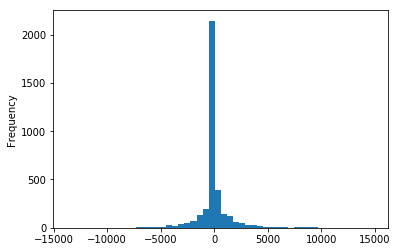

In [8]:
team_list = []
win_distance = []
lose_distance = []
win_pct = []
matches_played = []
for team in tqdm(df_main['WINNER'].unique()):
    team_list.append(team)
    win_distance.append(df_main[df_main['WINNER'] == team]['Winner Distance'].mean())
    lose_distance.append(df_main[df_main['LOSER'] == team]['Loser Distance'].mean())
    matches_played.append(len(df_main[df_main['WINNER'] == team]) + len(df_main[df_main['LOSER'] == team]))
    if len(df_main[df_main['LOSER'] == team]) != 0:
        win_pct.append(len(df_main[df_main['WINNER'] == team])/(len(df_main[df_main['LOSER'] == team]) + len(df_main[df_main['WINNER'] == team])))
    else:
        win_pct.append(1)
        
df_dist = pd.DataFrame()
df_dist['Team'] = team_list
df_dist['Win Dist'] = win_distance
df_dist['Lose Dist'] = lose_distance    
df_dist['Win Pct'] = win_pct
df_dist['Matches Played'] = matches_played
df_dist['Win dist - Lose dist'] = df_dist['Win Dist'] - df_dist['Lose Dist']
df_dist['Win dist - Lose dist'].plot(kind = 'hist', bins = 50)
df_dist['Win dist - Lose dist'].mean()

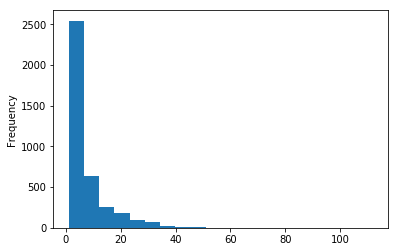

In [9]:
df_dist['Matches Played'].plot(kind = 'hist', bins = 20)

In [12]:
for i in [10,20,30,40,50,60]:
    temp = df_dist[df_dist['Matches Played'] < i]
    temp = df_dist[df_dist['Matches Played'] > i-5]
    print((temp['Win dist - Lose dist'].mean(),temp['Win dist - Lose dist'].std()))

(9.247483971360126, 1940.2445631740063)
(35.68844626012973, 1740.2416462973663)
(-24.670553039261875, 1618.9445768404464)
(21.85118902396081, 1905.7216959007571)
(1294.7174024032197, 1860.3520288760794)
(1280.70008816178, nan)


In [10]:
for i in [.2,.4,.6,.8,1]:
    temp = df_dist[df_dist['Win Pct'] < i]
    temp = df_dist[df_dist['Win Pct'] > i-.2]
    print((temp['Win dist - Lose dist'].mean(),temp['Win dist - Lose dist'].std()))

(31.908621638267594, 1714.7234747369462)
(34.237863608051136, 1670.16196183981)
(15.003814431264031, 1631.4817887137417)
(52.180608702722395, 1627.3741578003842)
(252.8598189486076, 2942.5017643792985)


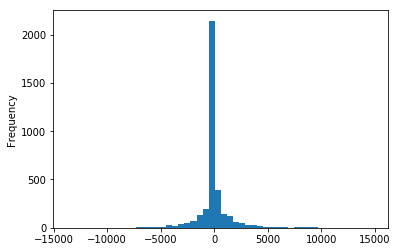

In [13]:
df_dist['Win dist - Lose dist'].plot(kind = 'hist', bins = 50)

It appears as it there is no clear trend that distance travelled is affecting the performance of players. There could be several reasons: Balance of pressure, people travel far for easier tournaments...

## Convert Country to CD

In [47]:
df_countries = pd.read_csv('country_list.csv', encoding='Latin-1')

def strip_country(x):
    c = x.split(',')[1].strip(' ')
    temp_df = df_countries[df_countries['Country or Area Name'] == c].sort_index(ascending = False)
    if temp_df.empty:
        print (c)
    else:
        code = list(temp_df['ISO ALPHA-3 Code'])[0]
        return (code)
    
df_main['match_location_cd'] = df_main['match_location'].apply(lambda x: strip_country(x))

In [54]:
def home_court(x,w_or_l):
    
    if w_or_l == 'w':
        if x['match_location_cd'] == x['Winning Country']:
            return (1)
        else:
            return (0)
    elif w_or_l == 'l':
        if x['match_location_cd'] == x['Losing Country']:
            return (1)
        else:
            return (0)

df_main['Winner Home'] = df_main.apply(lambda x: home_court(x,'w'), axis = 1)
df_main['Loser Home'] = df_main.apply(lambda x: home_court(x,'l'), axis = 1)

In [56]:
df_main.head()

,COUNTRIES,EVENT,PLAYERS,SCORES,match_location,match_week,Winning Country,Losing Country,Winning Country Coord_x,Winning Country Coord_y,...,Losing Country Coord_y,match_location Coord_x,match_location Coord_y,Winner Distance,Loser Distance,WINNER,LOSER,Winner Home,Loser Home,match_location_cd
9058,"['[JPN] ', '[CHN] ']",MS,"['Onodera Yusuke', 'Chen Haoyang']","['11-5', '13-11', '11-6']","Hainan, China",20170110,JPN,CHN,139.271495,36.655227,...,36.567348,109.6,19.2,3448.066472,835.149641,Onodera Yusuke,Chen Haoyang,0,1,CHN
9117,"['[CHN] ', '[CHN] ']",MS,"['Zhao Junpeng [2]', 'Zhu Siyuan']","['11-7', '6-11', '11-7', '6-11', '11-5']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,...,36.567348,109.6,19.2,835.149641,835.149641,Zhao Junpeng,Zhu Siyuan,1,1,CHN
9113,"['[CHN] ', '[CHN] ']",MS,"['Sun Feixiang', 'Wu Xin']","['11-7', '11-6', '11-7']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,...,36.567348,109.6,19.2,835.149641,835.149641,Sun Feixiang,Wu Xin,1,1,CHN
9108,"['[CHN] ', '[JPN] ']",MS,"['Zhao Junpeng [2]', 'Onodera Yusuke']","['11-5', '13-12', '11-3']","Hainan, China",20170110,CHN,JPN,103.930027,36.567348,...,36.655227,109.6,19.2,835.149641,3448.066472,Zhao Junpeng,Onodera Yusuke,1,0,CHN
9104,"['[CHN] ', '[CHN] ']",MS,"['Wu Xin', 'Guo Kai']","['11-1', '11-3', '13-11']","Hainan, China",20170110,CHN,CHN,103.930027,36.567348,...,36.567348,109.6,19.2,835.149641,835.149641,Wu Xin,Guo Kai,1,1,CHN


# Home court advantage

It may be the case that distance doesn't matter - it's an unfamiliar resting spot plus home crowd that makes a difference

In [57]:
df_hc = df_main[['PLAYERS','match_location','WINNER','LOSER','Winner Home','Loser Home']]

In [88]:
player_name = []
home_rounds = []
away_rounds = []

for pn in tqdm(df_hc['WINNER'].unique()):
    player_name.append(pn)
    temp = df_hc[df_hc['WINNER'].str.contains(pn)]
    temp['rounds'] = [1]*len(temp)
    temp = temp[['match_location','Winner Home','rounds']].groupby('match_location').sum().reset_index()

    home_rounds.append(temp[temp['Winner Home'] >= 1]['rounds'].mean())
    away_rounds.append(temp[temp['Winner Home'] == 0]['rounds'].mean())

df_homecourt = pd.DataFrame()
df_homecourt['Player/Team'] = player_name
df_homecourt['Home Rounds'] = home_rounds
df_homecourt['Away Rounds'] = away_rounds
df_homecourt['diff'] = df_homecourt['Home Rounds'] - df_homecourt['Away Rounds']

  0%|                                                                                         | 0/3815 [00:00<?, ?it/s]c:\users\andrew.zhuang\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
 35%|███████████████████████████▍                                                  | 1344/3815 [01:39<03:03, 13.48it/s]c:\users\andrew.zhuang\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
100%|██████████████████████████████████████████████████████████████████████████████| 3815/3815 [04:44<00:00, 13.41it/s]


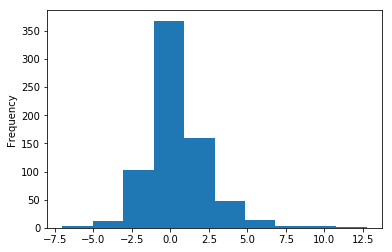

In [94]:
df_homecourt['diff'].plot(kind = 'hist')

In [95]:
df_homecourt['diff'].mean()

0.3415999733226624

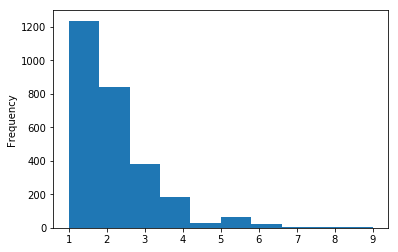

In [90]:
df_homecourt['Away Rounds'].plot(kind = 'hist')

In [92]:
df_homecourt['Away Rounds'].mean()

2.0657920457216234

In [ ]:
### EXTRACT COUNTRY IN match location and match it with it's code, and then identify home.

## Groupby Match locations to see rounds (not code)

# See how many rounds the home loctaion has compared to others
